In [1]:
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

# my own module
from conf.configure import Configure
from utils import data_util

In [2]:
import numpy as np
import pandas as pd
import datetime
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
import time
#%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.linear_model import Ridge, LassoCV,LassoLarsCV, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from scipy.stats import skew
from time import time

R2 = make_scorer(r2_score, greater_is_better=True)

In [3]:
print 'load datas...'
train, test = data_util.load_dataset()

y_train_all = train['y']
del train['ID']
del train['y']
id_test = test['ID']
del test['ID']

load datas...


In [4]:
X_train = train
X_test = test
y_train = y_train_all
y_mean = np.mean(y_train)
del train, test, y_train_all

In [5]:
def DeepCV(train, y_train_all, model): 
    train_r2_scores = []
    val_r2_scores = []
    num_boost_roundses = []
    df_columns = train.columns.values
    for i in range(0, 5):
        random_state = 42 + i
        X_train, X_val, y_train, y_val = train_test_split(train, y_train_all, test_size=0.25, random_state=random_state)

        y_mean = np.mean(y_train)
        model.fit(X_train, y_train)
        train_r2_score = r2_score(y_train, model.predict(X_train))
        val_r2_score = r2_score(y_val, model.predict(X_val))
        print 'perform {} cross-validate: train r2 score = {}, validate r2 score = {}'.format(i + 1, train_r2_score,
                                                                                              val_r2_score)
        train_r2_scores.append(train_r2_score)
        val_r2_scores.append(val_r2_score)

    print '\naverage train r2 score = {}, average validate r2 score = {}'.format(
        sum(train_r2_scores) / len(train_r2_scores),
        sum(val_r2_scores) / len(val_r2_scores))
    
def PrintImportance(X_train, y_train, model):
    model.fit(X_train, y_train)
    feat_imp = pd.Series(model.feature_importances_, X_train.columns).sort_values(ascending=False)[:50]
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    plt.figure(figsize=(50,50))

In [6]:
xtr0 = ExtraTreesRegressor(random_state=5)
DeepCV(X_train, y_train, xtr0)

perform 1 cross-validate: train r2 score = 0.983533124049, validate r2 score = 0.362887009881
perform 2 cross-validate: train r2 score = 0.979108336431, validate r2 score = 0.441691182335
perform 3 cross-validate: train r2 score = 0.979054797208, validate r2 score = 0.41565204445
perform 4 cross-validate: train r2 score = 0.977375454564, validate r2 score = 0.451593911691
perform 5 cross-validate: train r2 score = 0.977982624882, validate r2 score = 0.396868028353

average train r2 score = 0.979410867427, average validate r2 score = 0.413738435342


In [8]:
param_test = {'random_state':[5,10,48,123]}
gsearch = GridSearchCV(estimator = ExtraTreesRegressor(), 
param_grid = param_test, scoring=R2, n_jobs=-1, cv=10)#iid=False, 
gsearch.fit(X_train,y_train)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.47515, std: 0.09009, params: {'random_state': 5},
  mean: 0.47561, std: 0.08502, params: {'random_state': 10},
  mean: 0.46524, std: 0.09682, params: {'random_state': 48},
  mean: 0.46282, std: 0.08605, params: {'random_state': 123}],
 {'random_state': 10},
 0.47560708144987524)

In [11]:
param_test = {'n_estimators':range(100,1000,100)}
gsearch = GridSearchCV(estimator = ExtraTreesRegressor(min_samples_split=40,max_depth=5,
                        min_samples_leaf=50,max_features='sqrt',random_state=10), 
param_grid = param_test, scoring=R2, n_jobs=-1, cv=10)#iid=False, 
gsearch.fit(X_train,y_train)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.50358, std: 0.08177, params: {'n_estimators': 100},
  mean: 0.50892, std: 0.08066, params: {'n_estimators': 200},
  mean: 0.50748, std: 0.08003, params: {'n_estimators': 300},
  mean: 0.50876, std: 0.07951, params: {'n_estimators': 400},
  mean: 0.50845, std: 0.07959, params: {'n_estimators': 500},
  mean: 0.50908, std: 0.07970, params: {'n_estimators': 600},
  mean: 0.50903, std: 0.07955, params: {'n_estimators': 700},
  mean: 0.50914, std: 0.07943, params: {'n_estimators': 800},
  mean: 0.50868, std: 0.07928, params: {'n_estimators': 900}],
 {'n_estimators': 800},
 0.5091357182547988)

In [12]:
param_test = {'n_estimators':range(750,900,50)}
gsearch = GridSearchCV(estimator = ExtraTreesRegressor(min_samples_split=40,max_depth=5,
                        min_samples_leaf=50,max_features='sqrt',random_state=10),
param_grid = param_test, scoring=R2, n_jobs=-1, cv=10)#iid=False, 
gsearch.fit(X_train,y_train)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.50901, std: 0.07951, params: {'n_estimators': 750},
  mean: 0.50914, std: 0.07943, params: {'n_estimators': 800},
  mean: 0.50910, std: 0.07955, params: {'n_estimators': 850}],
 {'n_estimators': 800},
 0.5091357182547988)

In [15]:
param_test = {'max_depth':range(5,16,2), 'min_samples_split':range(20,100,20)}
gsearch = GridSearchCV(estimator = ExtraTreesRegressor(n_estimators=200,
                        min_samples_leaf=50, max_features='sqrt', random_state=10), 
param_grid = param_test, scoring=R2, n_jobs=-1, cv=10)#iid=False, 
gsearch.fit(X_train,y_train)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.50892, std: 0.08066, params: {'min_samples_split': 20, 'max_depth': 5},
  mean: 0.50892, std: 0.08066, params: {'min_samples_split': 40, 'max_depth': 5},
  mean: 0.50892, std: 0.08066, params: {'min_samples_split': 60, 'max_depth': 5},
  mean: 0.50892, std: 0.08066, params: {'min_samples_split': 80, 'max_depth': 5},
  mean: 0.53809, std: 0.08317, params: {'min_samples_split': 20, 'max_depth': 7},
  mean: 0.53809, std: 0.08317, params: {'min_samples_split': 40, 'max_depth': 7},
  mean: 0.53809, std: 0.08317, params: {'min_samples_split': 60, 'max_depth': 7},
  mean: 0.53809, std: 0.08317, params: {'min_samples_split': 80, 'max_depth': 7},
  mean: 0.54835, std: 0.08406, params: {'min_samples_split': 20, 'max_depth': 9},
  mean: 0.54835, std: 0.08406, params: {'min_samples_split': 40, 'max_depth': 9},
  mean: 0.54835, std: 0.08406, params: {'min_samples_split': 60, 'max_depth': 9},
  mean: 0.54835, std: 0.08406, params: {'min_samples_split': 80, 'max_depth': 9},
  mean: 0.54940,

In [16]:
param_test = {'max_depth':range(12,15,1), 'min_samples_split':range(100,400,100)}
gsearch = GridSearchCV(estimator = ExtraTreesRegressor(n_estimators=200,
                        min_samples_leaf=50,max_features='sqrt', random_state=10), 
param_grid = param_test, scoring=R2, n_jobs=-1, cv=10)#iid=False, 
gsearch.fit(X_train,y_train)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.54914, std: 0.08452, params: {'min_samples_split': 100, 'max_depth': 12},
  mean: 0.54704, std: 0.08432, params: {'min_samples_split': 200, 'max_depth': 12},
  mean: 0.54133, std: 0.08336, params: {'min_samples_split': 300, 'max_depth': 12},
  mean: 0.55006, std: 0.08475, params: {'min_samples_split': 100, 'max_depth': 13},
  mean: 0.54701, std: 0.08433, params: {'min_samples_split': 200, 'max_depth': 13},
  mean: 0.54123, std: 0.08335, params: {'min_samples_split': 300, 'max_depth': 13},
  mean: 0.54995, std: 0.08442, params: {'min_samples_split': 100, 'max_depth': 14},
  mean: 0.54698, std: 0.08415, params: {'min_samples_split': 200, 'max_depth': 14},
  mean: 0.54128, std: 0.08336, params: {'min_samples_split': 300, 'max_depth': 14}],
 {'max_depth': 13, 'min_samples_split': 100},
 0.5500607351458262)

In [17]:
param_test = {'min_samples_split':[20], 'min_samples_leaf':range(20,100,20)}
gsearch = GridSearchCV(estimator = ExtraTreesRegressor(max_depth=13, n_estimators=200,
                        max_features='sqrt',random_state=10, min_samples_split=20), 
param_grid = param_test, scoring=R2, n_jobs=-1, cv=10)#iid=False, 
gsearch.fit(X_train,y_train)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.56000, std: 0.08680, params: {'min_samples_split': 20, 'min_samples_leaf': 20},
  mean: 0.55435, std: 0.08545, params: {'min_samples_split': 20, 'min_samples_leaf': 40},
  mean: 0.54640, std: 0.08567, params: {'min_samples_split': 20, 'min_samples_leaf': 60},
  mean: 0.53898, std: 0.08283, params: {'min_samples_split': 20, 'min_samples_leaf': 80}],
 {'min_samples_leaf': 20, 'min_samples_split': 20},
 0.5600001543458863)

In [18]:
param_test = {'min_samples_split':[20], 'min_samples_leaf':range(10,40,10)}
gsearch = GridSearchCV(estimator = ExtraTreesRegressor(max_depth=13, n_estimators=200,
                        max_features='sqrt',random_state=10, min_samples_split=20), 
param_grid = param_test, scoring=R2, n_jobs=-1, cv=10)#iid=False, 
gsearch.fit(X_train,y_train)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.56389, std: 0.08757, params: {'min_samples_split': 20, 'min_samples_leaf': 10},
  mean: 0.56000, std: 0.08680, params: {'min_samples_split': 20, 'min_samples_leaf': 20},
  mean: 0.55742, std: 0.08635, params: {'min_samples_split': 20, 'min_samples_leaf': 30}],
 {'min_samples_leaf': 10, 'min_samples_split': 20},
 0.5638895346038449)

In [22]:
model = ExtraTreesRegressor(max_depth=13, n_estimators=200, min_samples_leaf=10,
                        max_features='sqrt',random_state=10, min_samples_split=20)
DeepCV(X_train, y_train, model)

perform 1 cross-validate: train r2 score = 0.640715768873, validate r2 score = 0.547712435609
perform 2 cross-validate: train r2 score = 0.634243272185, validate r2 score = 0.563549147794
perform 3 cross-validate: train r2 score = 0.644224887747, validate r2 score = 0.535152049839
perform 4 cross-validate: train r2 score = 0.628602115726, validate r2 score = 0.594134745193
perform 5 cross-validate: train r2 score = 0.671450052028, validate r2 score = 0.461470128151

average train r2 score = 0.643847219312, average validate r2 score = 0.540403701317


In [23]:
param_test = {'max_features':1/10.0*np.arange(1,10,1)}
gsearch = GridSearchCV(estimator = ExtraTreesRegressor(max_depth=13, n_estimators=200,
                        min_samples_leaf=10,min_samples_split=20, 
                        max_features='sqrt',random_state=10), 
param_grid = param_test, scoring=R2, n_jobs=-1, cv=10)#iid=False, 
gsearch.fit(X_train,y_train)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.57030, std: 0.08892, params: {'max_features': 0.10000000000000001},
  mean: 0.57401, std: 0.09122, params: {'max_features': 0.20000000000000001},
  mean: 0.57505, std: 0.09109, params: {'max_features': 0.30000000000000004},
  mean: 0.57553, std: 0.09089, params: {'max_features': 0.40000000000000002},
  mean: 0.57543, std: 0.09089, params: {'max_features': 0.5},
  mean: 0.57498, std: 0.09010, params: {'max_features': 0.60000000000000009},
  mean: 0.57629, std: 0.09074, params: {'max_features': 0.70000000000000007},
  mean: 0.57593, std: 0.09000, params: {'max_features': 0.80000000000000004},
  mean: 0.57545, std: 0.08994, params: {'max_features': 0.90000000000000002}],
 {'max_features': 0.70000000000000007},
 0.5762866669985064)

In [27]:
param_test = {'n_estimators':range(50,300,50)}
gsearch = GridSearchCV(estimator = ExtraTreesRegressor(max_depth=13, n_estimators=200,
                        min_samples_leaf=10,min_samples_split=20, 
                        max_features=.7,random_state=10), 
param_grid = param_test, scoring=R2, n_jobs=-1, cv=10)#iid=False, 
gsearch.fit(X_train,y_train)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.57428, std: 0.09018, params: {'n_estimators': 50},
  mean: 0.57558, std: 0.09049, params: {'n_estimators': 100},
  mean: 0.57611, std: 0.09078, params: {'n_estimators': 150},
  mean: 0.57629, std: 0.09074, params: {'n_estimators': 200},
  mean: 0.57628, std: 0.09045, params: {'n_estimators': 250}],
 {'n_estimators': 200},
 0.5762866669985064)

In [25]:
model = ExtraTreesRegressor(max_depth=13, n_estimators=200,
                        min_samples_leaf=10,min_samples_split=20, 
                        max_features=.7,random_state=10)
DeepCV(X_train, y_train, model)

perform 1 cross-validate: train r2 score = 0.703370237136, validate r2 score = 0.550552460403
perform 2 cross-validate: train r2 score = 0.699668978491, validate r2 score = 0.565781673831
perform 3 cross-validate: train r2 score = 0.710944077573, validate r2 score = 0.538121232872
perform 4 cross-validate: train r2 score = 0.698362510599, validate r2 score = 0.606948456911
perform 5 cross-validate: train r2 score = 0.73417251167, validate r2 score = 0.483651112916

average train r2 score = 0.709303663094, average validate r2 score = 0.549010987387


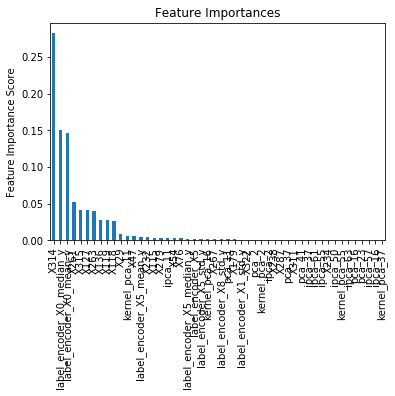

In [30]:
PrintImportance(model=model, X_train=X_train, y_train=y_train)

In [28]:
EXTreg=ExtraTreesRegressor(max_depth=13, n_estimators=200,
                        min_samples_leaf=10,min_samples_split=20, 
                        max_features=.7,random_state=10)
EXTreg.fit(X_train, y_train)
y_predict = EXTreg.predict(X_test)
#y_predict = np.round(y_predict)#np.round(y_predict * 0.99)
#output = pd.DataFrame({'id': id_test, 'price_doc': y_predict})

In [29]:
output = pd.DataFrame({'ID': id_test, 'y': y_predict})
output.to_csv('../result/jul3_2.csv', index=False)